In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query




In [3]:
query = 'select * from customers limit 4;'
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [4]:
query = 'show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [5]:
query = """select * from salesdata limit 3;"""
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [6]:
query = """Select s.customerid, c.firstname, s.saledate, s.totalprice
from salesdata s
join customers c
on s.customerid= c.customerid
limit 5;"""

read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [7]:
query = """
Select customerid,sum(totalprice) as expenditure
from salesdata 
group by customerid 
limit 5;"""

read_query(query)

,customerid,expenditure
0,C-2023-100-1,9933032.00
1,C-2023-100-10,9779316.00
2,C-2023-100-100,9889393.00
3,C-2023-100-101,9168084.00
4,C-2023-100-102,10315608.00


In [8]:
query = """ 
select t.customerid,c.firstname,t.expenditure
from 
(select customerid,
sum(totalprice) as expenditure
from salesdata 
group by customerid) t
join customers c
on t.customerid=c.customerid;"""

read_query(query)

,customerid,firstname,expenditure
0,C-2023-100-1,Mahika,9933032.00
1,C-2023-100-10,Zeeshan,9779316.00
2,C-2023-100-100,Aaina,9889393.00
3,C-2023-100-101,Shray,9168084.00
4,C-2023-100-102,Navya,10315608.00
...,...,...,...
195,C-2023-100-95,Taran,8826287.00
196,C-2023-100-96,Bhamini,9996920.00
197,C-2023-100-97,Hunar,10432046.00
198,C-2023-100-98,Riaan,8863324.00


In [9]:
query = """ 
select t.customerid,c.firstname,t.expenditure
from 
(select customerid,
sum(totalprice) as expenditure
from salesdata 
group by customerid) t
join customers c
on t.customerid=c.customerid
order by t.expenditure desc
limit 10;"""

top_annual_customers = read_query(query)
top_annual_customers

,customerid,firstname,expenditure
0,C-2023-100-13,Veer,13016064.00
1,C-2023-100-94,Priyansh,12629337.00
2,C-2023-100-57,Riya,12599608.00
3,C-2023-100-58,Vanya,12455437.00
4,C-2023-100-88,Dhruv,12280916.00
5,C-2023-100-165,Tarini,12130487.00
6,C-2023-100-197,Yuvraj,11868602.00
7,C-2023-100-199,Rhea,11704275.00
8,C-2023-100-196,Darshit,11520699.00
9,C-2023-100-75,Prerak,11442527.00


In [10]:
top_annual_customers['expenditure'].astype(float)

0    13016064.0
1    12629337.0
2    12599608.0
3    12455437.0
4    12280916.0
5    12130487.0
6    11868602.0
7    11704275.0
8    11520699.0
9    11442527.0
Name: expenditure, dtype: float64

In [11]:
top_annual_customers['expenditure'].values

array([Decimal('13016064.00'), Decimal('12629337.00'),
       Decimal('12599608.00'), Decimal('12455437.00'),
       Decimal('12280916.00'), Decimal('12130487.00'),
       Decimal('11868602.00'), Decimal('11704275.00'),
       Decimal('11520699.00'), Decimal('11442527.00')], dtype=object)

In [12]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerid   10 non-null     object
 1   firstname    10 non-null     object
 2   expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [13]:
customer_names = top_annual_customers['firstname'].values

In [14]:
top_annual_customers['expenditure'] = top_annual_customers['expenditure'].astype(float)

In [15]:
customer_exp = top_annual_customers['expenditure'].values

<h1 style='color:white; font-family:roboto; font-size:50px'>using cmap

<h1 style>

In [35]:
# cmap = plt.cm.PuBuGn(np.linspace(0.5,1,len(products)))

In [3]:
cmap_val = np.linspace(0.3,1,10)

In [ ]:
# cmap = plt.cm.PuBuGn(cmap_val)

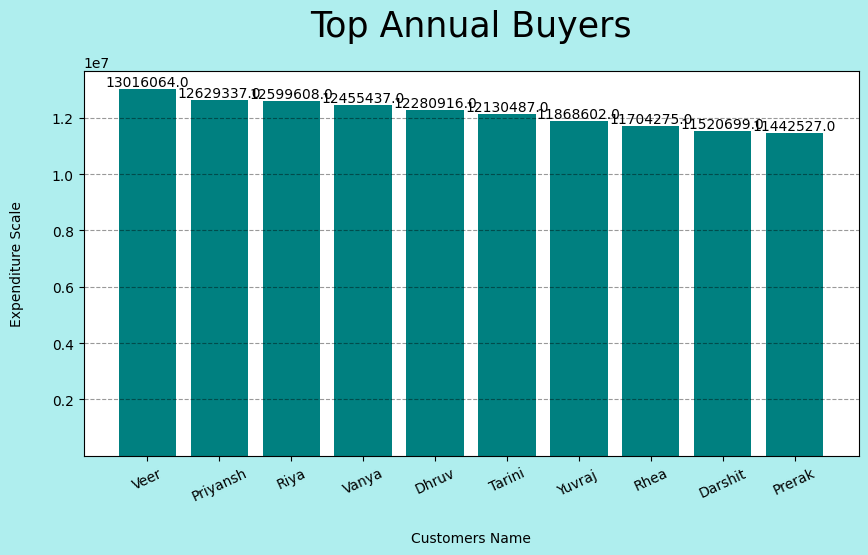

In [16]:
                       # colors = make a list n then pass it to the bar
plt.figure(figsize=(10,5))
plt.bar(height=customer_exp,x=customer_names,bottom=20,width=0.8,color='teal')
# plt.plot(color='green')

#title of the graph
plt.title('Top Annual Buyers',pad=25,size=25,color='black')


#customizing the graph
plt.xlabel('Customers Name',labelpad=20)
plt.ylabel('Expenditure Scale',labelpad=20)

#providing sticks
plt.xticks(rotation=25)

#making grids
plt.grid(axis='y',alpha=0.4,color='black',ls='dashed')
plt.gcf().set_facecolor('paleturquoise')


#giving annotations
for i in range(len(customer_names)):

    plt.annotate(text=customer_exp[i],xy=(i,customer_exp[i]),
                 horizontalalignment='center',#center,right,left
                 verticalalignment='bottom') ,#top,bottom.center

    
# plt.savefig('Top_buyers.jpeg')


plt.show()

In [17]:
query = 'show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [18]:
query = 'select * from salesdata limit 10;'
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
5,23005,C-2023-100-72,6015,1012,2023-11-22,5,396935.00
6,23006,C-2023-100-78,6015,1044,2023-10-26,5,396935.00
7,23007,C-2023-100-36,6017,1018,2023-03-29,5,295510.00
8,23008,C-2023-100-147,6030,1049,2023-01-17,3,201936.00
9,23009,C-2023-100-7,6019,1047,2023-07-19,4,56188.00


In [19]:
query = """select monthname(s.saledate) as monthname,
    e.firstname,
    sum(s.totalprice) as totalsales
 from salesdata s
    join employees e
    on s.employeeid = e.employeeid
where monthname(saledate) = 'january'
group by monthname(s.saledate),e.firstname
order by totalsales desc
limit 10;"""

df = read_query(query=query)

In [20]:
df

,monthname,firstname,totalsales
0,January,Bhavin,5775952.00
1,January,Nitara,5567036.00
2,January,Myra,4888628.00
3,January,Renee,3924716.00
4,January,Shray,3719152.00
5,January,Yuvaan,3348039.00
6,January,Anika,3152408.00
7,January,Kiaan,3136727.00
8,January,Yasmin,3135779.00
9,January,Hiran,3104523.00


In [21]:
df['totalsales'] = df['totalsales'].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   monthname   10 non-null     object 
 1   firstname   10 non-null     object 
 2   totalsales  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [23]:
sales = df['totalsales'].values
names = df['firstname'].values

In [24]:
sales

array([5775952., 5567036., 4888628., 3924716., 3719152., 3348039.,
       3152408., 3136727., 3135779., 3104523.])

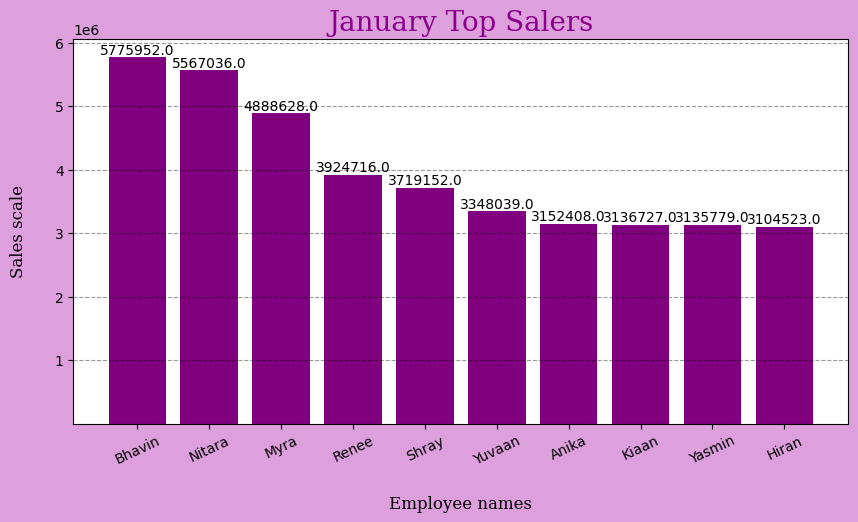

In [25]:
# 
font = {'family': 'serif',
        'color':  'darkmagenta',
        'weight': 'normal',
        'size': 20,
        }
font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
font3 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }



plt.figure(figsize=(10,5))
plt.bar(height=sales,x=names,bottom=20,width=0.8,color='purple')
plt.title('January Top Salers',fontdict= font)

plt.xlabel('Employee names',labelpad=20,fontdict=font2)
plt.ylabel('Sales scale',labelpad=20,fontdict=font3)

plt.grid(axis ='y',alpha=0.4,color='black',ls='dashed')
plt.gcf().set_facecolor('plum')
plt.xticks(rotation=25)



for i in range(len(names)):
    
    plt.annotate(text=sales[i],xy=(i,sales[i]),
                 horizontalalignment='center',#center,right,left
                 verticalalignment='bottom') ,#top,bottom.center

plt.show()


1. Provide a visual representation of our annual sales performance over time?


In [26]:
query = """select months,monthlysales 
from
	( select month(saledate),monthname(saledate) as months,
	sum(totalprice) as monthlysales
	from salesdata
	group by month(saledate),monthname(saledate)
	order by month(saledate)) t;"""

df = read_query(query)
df

,months,monthlysales
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00
5,June,143529379.00
6,July,149811843.00
7,August,158477094.00
8,September,146743920.00
9,October,143488837.00


In [27]:
months = df['months'].values 
sales = df['monthlysales'].astype('float').values

In [28]:
annual_avg = df['monthlysales'].mean()

In [29]:
goal = annual_avg*1.05

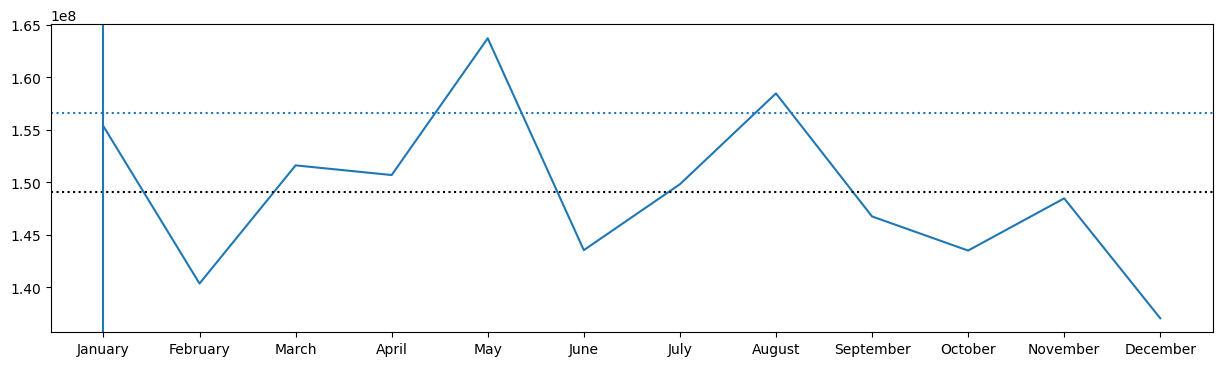

In [30]:
plt.figure(figsize=(15,4)) 
plt.plot(months,sales) 
plt.axhline(y=annual_avg,color='black',ls = 'dotted')   #annual avg line 
plt.axhline(y=goal,ls='dotted')
plt.axvline()

plt.show()


2. The client is interested in understanding how the sales have been fluctuating
over time to identify any underlying patterns or anomalies Analyze the trend in
our monthly sales using a moving average technique

In [51]:
query = """ select
months,
AVG(monthlysales) OVER (ORDER BY monthnum ROWS BETWEEN 3
PRECEDING AND CURRENT ROW) AS MovingAverage
from
(SELECT
month(saledate) monthnum,
monthname(SaleDate) as months,
sum(totalprice) as monthlysales
FROM Salesdata
Group by month(saledate),monthname(saledate)) t;
"""
mavg = read_query(query)
mavg

,months,MovingAverage
0,January,155340130.000000
1,February,147842659.500000
2,March,149099290.000000
3,April,149497368.500000
4,May,151595866.000000
5,June,152391913.500000
6,July,151941736.500000
7,August,153888109.000000
8,September,149640559.000000
9,October,149630423.500000


In [62]:
moving_avg = mavg['MovingAverage'].astype(float).values
print(moving_avg)

[1.55340130e+08 1.47842660e+08 1.49099290e+08 1.49497368e+08
 1.51595866e+08 1.52391914e+08 1.51941736e+08 1.53888109e+08
 1.49640559e+08 1.49630424e+08 1.49294489e+08 1.43933044e+08]


In [55]:
Months = mavg['months'].values
print(Months)

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


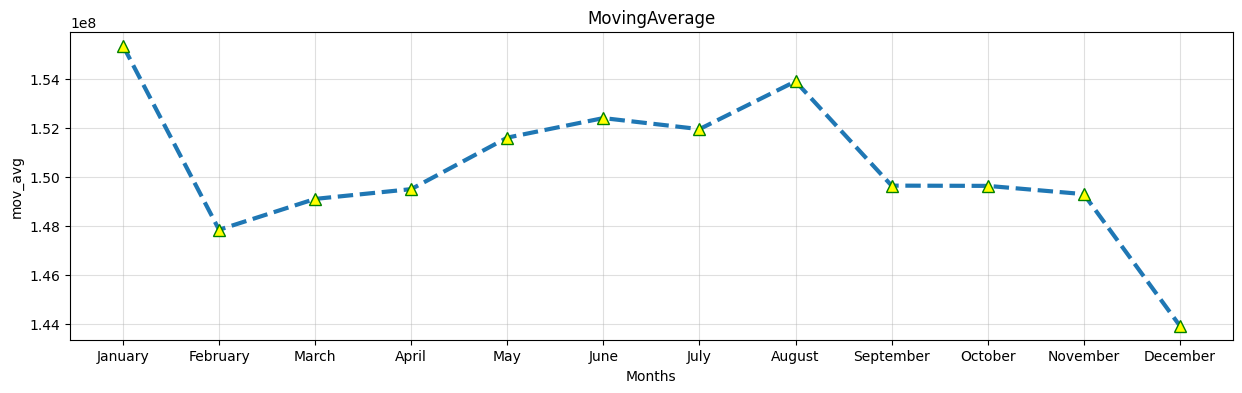

In [66]:
plt.figure(figsize=(15,4)) 
plt.plot(months,moving_avg,ls='dashed',marker='^',mec = 'green',ms = 8,mfc = 'yellow',lw =3) 
    
plt.title('MovingAverage')
plt.xlabel('Months')
plt.ylabel('mov_avg')


plt.grid(alpha=0.4)

plt.show()

3. Explore the month-over-month growth rate in sales

In [67]:
query = """ SELECT
MONTH(SaleDate) AS Monthnum,
monthname(saledate) as months,
100*(SUM(TotalPrice) - LAG(SUM(TotalPrice)) OVER (ORDER BY
MONTH(SaleDate)))/
LAG(SUM(TotalPrice)) OVER (ORDER BY MONTH(SaleDate))AS
'growthrate in %'
FROM Salesdata
GROUP BY YEAR(SaleDate), MONTH(SaleDate),monthname(saledate)
ORDER BY YEAR(SaleDate), MONTH(SaleDate),monthname(saledate);
"""
df = read_query(query)
df

,Monthnum,months,growthrate in %
0,1,January,None
1,2,February,-9.652973
2,3,March,8.028321
3,4,April,-0.607435
4,5,May,8.655105
5,6,June,-12.339970
6,7,July,4.377128
7,8,August,5.784089
8,9,September,-7.403703
9,10,October,-2.218206


5. What are the total sales made by each employee?

In [36]:
query = """ select e.EmployeeID, concat(e.firstname,' ',e.lastname) as fullname,
sum(s.totalprice) as total_sales
from employees e
join salesdata s
on s.EmployeeID=e.EmployeeID
group by EmployeeID
   limit 10;  """
total_sales = read_query(query)
total_sales

,EmployeeID,fullname,total_sales
0,1001,Fateh Roy,18231579.00
1,1002,Chirag Balan,18042772.00
2,1003,Dhanush Lata,16151819.00
3,1004,Anika Batta,13648670.00
4,1005,Keya Dixit,11565845.00
5,1006,Samaira Guha,15121183.00
6,1007,Vedika Kaul,15135829.00
7,1008,Rhea Handa,14239241.00
8,1009,Seher Shah,13817169.00
9,1010,Diya Varughese,12706602.00


In [37]:
Names = total_sales['fullname'].values
print(Names)

['Fateh Roy' 'Chirag Balan' 'Dhanush Lata' 'Anika Batta' 'Keya Dixit'
 'Samaira Guha' 'Vedika Kaul' 'Rhea Handa' 'Seher Shah' 'Diya Varughese']


In [38]:
Sales = total_sales['total_sales'].values
print(Sales)

[Decimal('18231579.00') Decimal('18042772.00') Decimal('16151819.00')
 Decimal('13648670.00') Decimal('11565845.00') Decimal('15121183.00')
 Decimal('15135829.00') Decimal('14239241.00') Decimal('13817169.00')
 Decimal('12706602.00')]


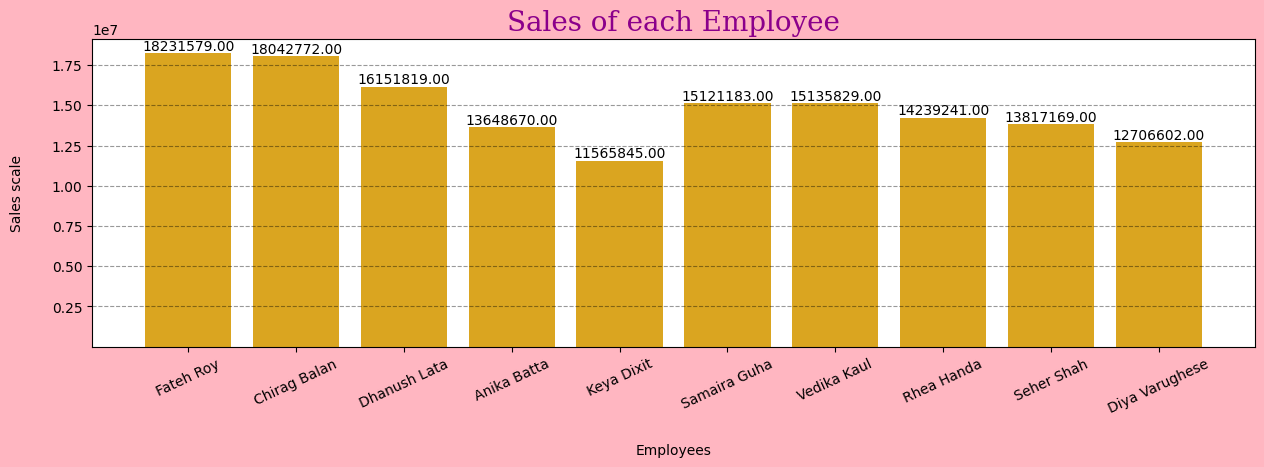

In [49]:
font = {'family': 'serif',
        'color':  'darkmagenta',
        'weight': 'normal',
        'size': 20,
        }


plt.figure(figsize=(15,4)) 
plt.bar(height=Sales,x=Names,bottom=20,width=0.8,color='goldenrod')   
plt.title('Sales of each Employee',fontdict=font)

plt.xlabel('Employees',labelpad=20)
plt.ylabel('Sales scale',labelpad=20)

plt.grid(axis ='y',alpha=0.4,color='black',ls='dashed')
plt.gcf().set_facecolor('lightpink')
plt.xticks(rotation=25)



for i in range(len(Names)):
    
    plt.annotate(text=Sales[i],xy=(i,Sales[i]),
                 horizontalalignment='center',#center,right,left
                 verticalalignment='bottom') ,#top,bottom.center

plt.show()
